# Problem Set 4
## Submit to Canvas by May 29, 2023 at 11:59 PM

In class, you learned about the fast Fourier transform (FFT) algorithm, which is often named one of the most important algorithms of all time. In this problem set, you'll work on your intuition for the Fourier transform, and you'll experiment with one of its potential use cases.

## Question 1 (2 points)

The plots below show a series of 1D functions and their Fourier transforms. Match each Fourier transform in the left column with its corresponding function in the right column. Justify your choices by explaining why you chose each function.

![part1.png](part1.png)

### Your answers:

a)

b)

c)

d)

## Question 2 (2 points)

The plots below now show a series of 2D functions and their Fourier transforms. Match each Fourier transform in the left column with its corresponding function in the right column. Again, justify your choices by explaining why you chose each function.

![part1.png](part2.png)

### Your answers:

a)

b)

c)

d)

## Part 3 (6 points)

NASA's Artemis mission has just returned astronauts to the Moon for the first time in more than 50 years. The world is eagerly awaiting picture proof, but oh no! The image appears to be covered in static. Scientists suspect that some noise must have been introduced as the photograph was sent from the Moon back to Earth. Can you use the Fourier transform to remove some of this noise?

![moon.png](moon.png)

In [2]:
# Import libraries, including openCV from problem set 1
import numpy as np
import scipy
import matplotlib.pyplot as plt
import cv2

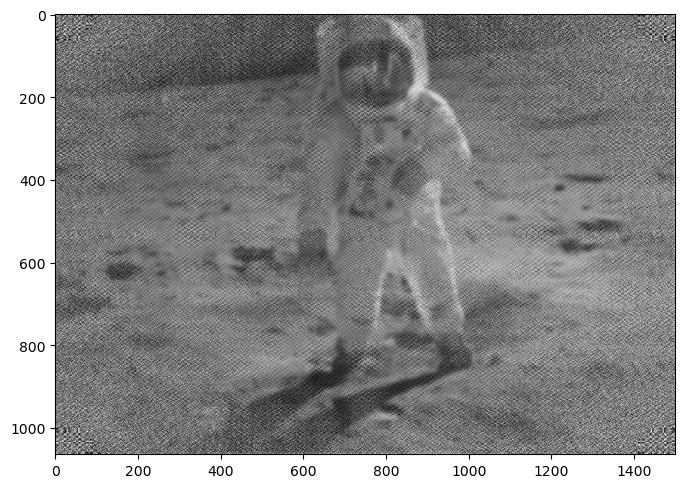

In [3]:
# Open image using openCV
im = cv2.imread('moon.png', cv2.IMREAD_GRAYSCALE)

# Show image as-is
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(im, cmap='gray')

Clearly this image is dull and covered in static. Perhaps we can learn more by taking an FFT?

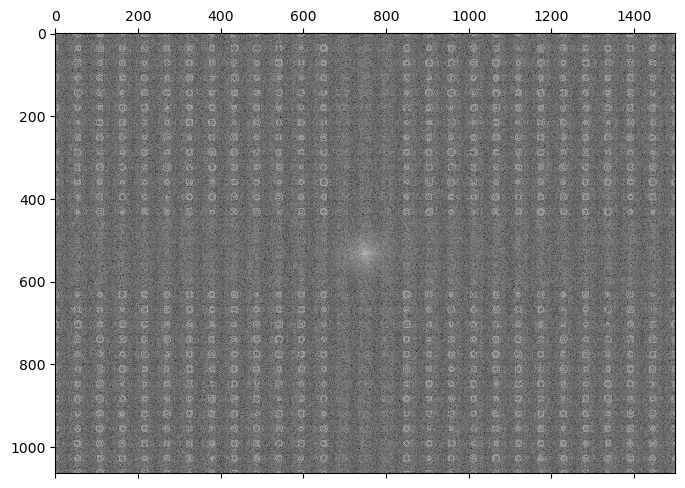

In [4]:
# Let's take the 2D FFT of the image
'''
    TO DO: Take a 2D FFT of the image using scipy
'''
fft = scipy.fft.fft2(im)

# Make sure to shift everything so high frequencies are in the center
#     and low frequencies are towards the edges (for simplicity)
'''
    TO DO: Shift the frequencies to center the highest ones using scipy
'''
fft = scipy.fft.fftshift(fft)

# Plot
# Let's use log scale since some frequencies are *very* high
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.matshow(np.log10(np.abs(fft)), cmap='gray')

It looks like there are lots of dots all over the place. But luckily they're not as concentrated around the center. Trim these dots away by only keeping a relatively small number of frequencies around the center.

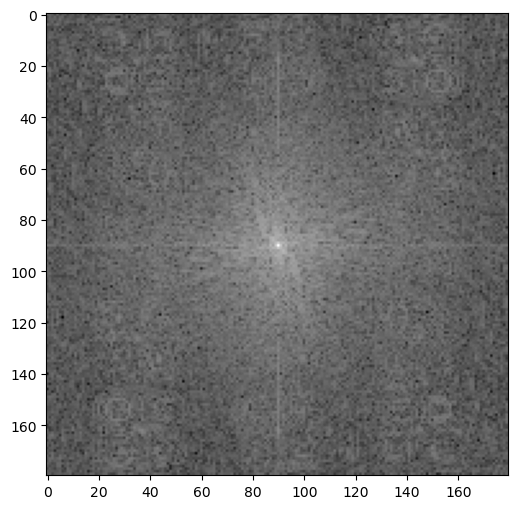

In [13]:
trimmed = fft.copy()

'''
    TO DO: Trim away some number of frequencies and re-plot the result.
'''
x_width = 90
y_width = 90
trimmed = trimmed[532 - x_width:532 + x_width, 750-y_width:750+y_width]
    
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(np.log10(np.abs(trimmed)), cmap='gray')

Now use the cell below to check your work. How does the image look? You may have to try a few different values for the number of frequencies to trim away. The image won't look perfect, but it should certainly look better.

True

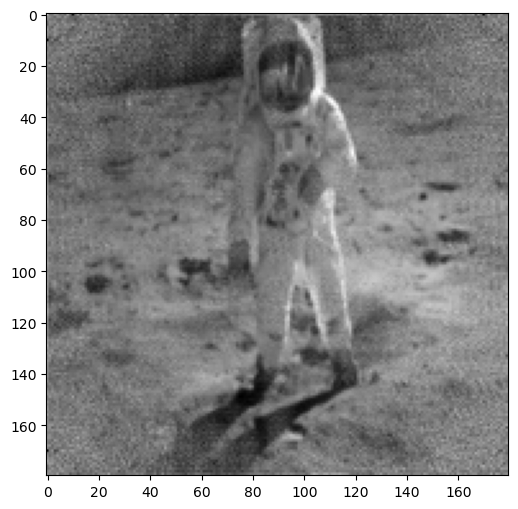

In [14]:
# Now we need to un-shift everything
'''
    TO DO: Unshift the frequencies to return the highest ones to the corners using scipy
'''
ifft = scipy.fft.ifftshift(trimmed)

# Let's inverse 2D FFT the image
'''
    TO DO: Take a 2D inverse FFT using scipy
'''
ifft = scipy.fft.ifft2(ifft)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(ifft.real, cmap='gray')
cv2.imwrite('moon_fixed.png', ifft.real)

You may want to open `moon.png` and `moon_fixed.png` on your computer to see the true difference as the image rendering from `matplotlib` isn't the highest quality.